In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#9a3324"

x = np.array([240.9265854427684, 240.8963015760633, 240.5736032251133, 240.6399957590363, 240.61441165807244, 240.68982712125447, 240.83227253321616, 240.60258613616128, 240.7148239391159, 240.468983076827, 240.61275123572125, 240.26105475379285, 240.2268812646392, 240.21590447544705, 240.2053639192478, 240.00363419462445, 240.4828956869732, 240.3573040901464, 240.5915793362385, 240.6442989614996, 240.5091493859994, 240.1820275808149, 240.1797478859975, 240.34868786563737, 240.69860180886, 240.77873022488143, 240.26195325565843, 240.33322766601748, 240.452710968859, 240.30260078345225, 240.48877612464565, 240.7510009267993, 240.90822649394383, 240.867149168373, 240.65662770646003, 240.68104467582128, 240.5256548345588, 240.5999229407665, 240.48954510581743, 240.3144729448758, 240.4799059898788, 240.6711120284316, 241.0822410575128, 240.168393022574, 240.5672863040377, 240.7841831762641])

y = np.array([476.9408993349242, 476.8806541824844, 477.36858121868624, 477.1216401795149, 477.1689046700071, 477.1741042653318, 476.79929446333534, 477.4179112132433, 477.14340168880966, 477.198334300069, 477.3310911610236, 477.355604581554, 477.7409171659323, 477.2960705960501, 477.67956892890953, 477.1436019226202, 477.1580677708769, 477.5452261982512, 477.42995267410873, 477.3513545369385, 477.3700975416047, 477.1044694865739, 477.6454487981103, 477.1011593430373, 477.41821825451535, 477.1692814335183, 476.97832710044486, 476.91458854871615, 477.13677731271895, 477.318436109052, 477.34442566347553, 477.2608867503726, 476.869862784846, 477.4419358580657, 477.39890805431867, 477.7957915860437, 477.2928936513957, 476.8651925124463, 477.0007869112032, 477.5049715674649, 477.53811143054, 477.4783024129098, 477.1450031931729, 476.9825240851895, 477.6949105514736, 477.09279133729456])

t = np.array([88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133])



In [4]:
d = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2) * 117

In [5]:
x = (x - x[0]) * 117
y = (y - y[0]) * 117
t = (t - t[0]) * 20

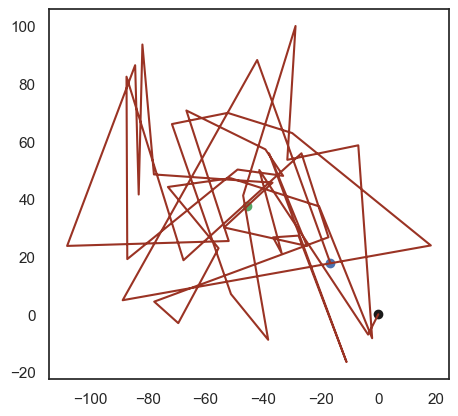

In [26]:
plt.figure()
plt.plot(x[0], y[0], 'ko')
plt.plot(x[-1], y[-1], 'bo')
plt.plot(x.mean(), y.mean(), "go")
plt.plot(x,y, color=color, ls='-')
plt.axis("scaled")
plt.show()

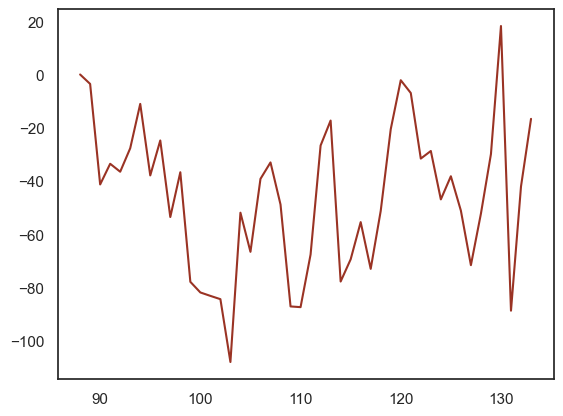

In [12]:
plt.figure()
plt.plot(t,x, color=color, ls='-')
plt.show()

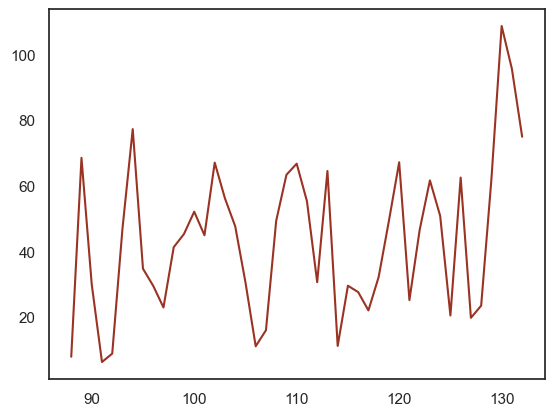

In [14]:
plt.figure()
plt.plot(t[:-1],d, color=color, ls='-')
plt.show()

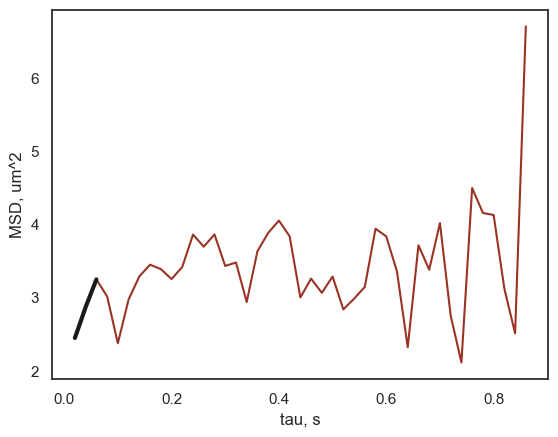

In [23]:
MSD = np.array([0.0024495880764593405, 0.0028705983378395313, 0.0032482244061081446, 0.0030158277061624523, 0.002376837713790726, 0.002974471589131568, 0.003289622539127141, 0.0034486017971816275, 0.003389063442526202, 0.003253403762711359, 0.0034180817180122433, 0.003859400159157834, 0.003694593587378645, 0.003862095800856021, 0.003431598260426218, 0.003479015853641133, 0.0029405859738548474, 0.003631686978982411, 0.0038821603798312662, 0.004050966970256375, 0.003836131722207589, 0.0030022426066963087, 0.003258949798804587, 0.0030646106970445854, 0.0032869205333247143, 0.0028393797282501953, 0.0029843047725347073, 0.0031455097138826642, 0.0039400086784425505, 0.003835124368371071, 0.0033552622898596804, 0.002323178690959163, 0.0037136820535559087, 0.0033806433138982993, 0.004016757336941059, 0.0027539086120686044, 0.002115078059151101, 0.004496223535171565, 0.004154702901230893, 0.004127138614626939, 0.003121911244099637, 0.002512850027064532, 0.006699655888117828]) * 1000
tau = np.array([0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86])

plt.figure()
plt.plot(tau,MSD, color=color, ls='-')
plt.plot(tau[:3],MSD[:3], color='k', ls='-', lw=3)
plt.xlabel("tau, s")
plt.ylabel("MSD, um^2")
plt.show()

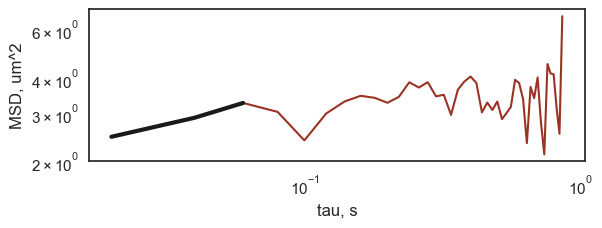

In [24]:
plt.figure()
plt.plot(tau,MSD, color=color, ls='-')
plt.plot(tau[:3],MSD[:3], color='k', ls='-', lw=3)
plt.xlabel("tau, s")
plt.ylabel("MSD, um^2")
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.axis("scaled")
plt.show()

# MSD = 2 n D tau^alpha = 4 D tau^alpha
# log(MSD) = alpha * log(tau) + log(D) + log(4)
# Therefore, slope = alpha; intercept = log(D) + log(4)

In [25]:
mean_x = x.mean()
mean_y = y.mean()
RMSD = np.sqrt(np.mean((x - mean_x)**2 + (y -  mean_y)**2))
RMSD

40.1565914195406

In [39]:
max_d_to_center = np.sqrt(np.max((x - mean_x)**2 + (y -  mean_y)**2))
d_to_center = np.sqrt((x - mean_x)**2 + (y -  mean_y)**2)
max_d_to_center

66.55275499570767

In [40]:
max_d_to_start = np.sqrt(np.max((x - x[0])**2 + (y -  y[0])**2))
d_to_start = np.sqrt((x - x[0])**2 + (y -  y[0])**2)
max_d_to_start

124.35148747132455

In [53]:
(x-np.atleast_2d(x).T)**2

array([[0.00000000e+00, 1.25543541e+01, 1.70560075e+03, ...,
        7.86920031e+03, 1.76719338e+03, 2.77591093e+02],
       [1.25543541e+01, 0.00000000e+00, 1.42549342e+03, ...,
        7.25312845e+03, 1.48184861e+03, 1.72078061e+02],
       [1.70560075e+03, 1.42549342e+03, 0.00000000e+00, ...,
        2.24766957e+03, 5.46238900e-01, 6.07023864e+02],
       ...,
       [7.86920031e+03, 7.25312845e+03, 2.24766957e+03, ...,
        0.00000000e+00, 2.17813687e+03, 5.19083476e+03],
       [1.76719338e+03, 1.48184861e+03, 5.46238900e-01, ...,
        2.17813687e+03, 0.00000000e+00, 6.43988782e+02],
       [2.77591093e+02, 1.72078061e+02, 6.07023864e+02, ...,
        5.19083476e+03, 6.43988782e+02, 0.00000000e+00]])

In [56]:
np.max(np.sqrt((x-np.atleast_2d(x).T)**2 + (y-np.atleast_2d(y).T)**2))

130.974792949081

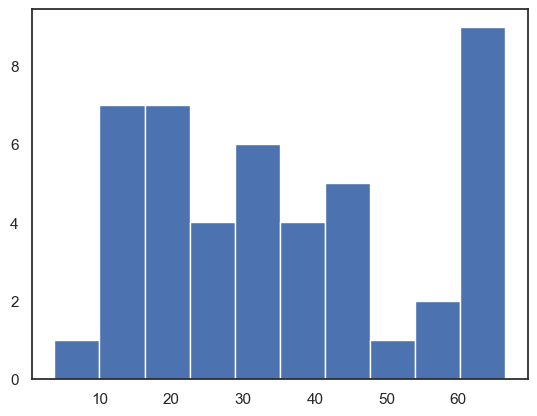

In [41]:
plt.hist(d_to_center)
plt.show()

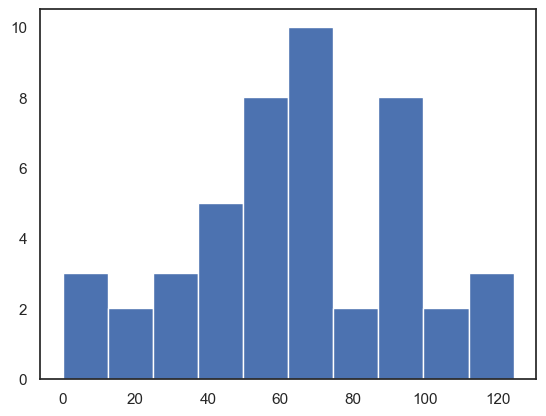

In [42]:
plt.hist(d_to_start)
plt.show()

In [43]:
np.quantile(d_to_center, 0.9)

63.59789381518949

In [45]:
np.quantile(d_to_start, 0.9)

100.89478741241206